# EDA

Initial comparison between successful request and unsuccessful requests

In [1]:
#package imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from keras import metrics
tf.get_logger().setLevel('INFO')
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [2]:
# Load data
training_data = pd.read_json("train.json")
test_data = pd.read_json("test.json")

In [3]:
# Look at fields used in the test data
test_data.columns

Index(['giver_username_if_known', 'request_id', 'request_text_edit_aware',
       'request_title', 'requester_account_age_in_days_at_request',
       'requester_days_since_first_post_on_raop_at_request',
       'requester_number_of_comments_at_request',
       'requester_number_of_comments_in_raop_at_request',
       'requester_number_of_posts_at_request',
       'requester_number_of_posts_on_raop_at_request',
       'requester_number_of_subreddits_at_request',
       'requester_subreddits_at_request',
       'requester_upvotes_minus_downvotes_at_request',
       'requester_upvotes_plus_downvotes_at_request', 'requester_username',
       'unix_timestamp_of_request', 'unix_timestamp_of_request_utc'],
      dtype='object')

In [4]:
# Look at the fields available in the training data
training_data.columns

Index(['giver_username_if_known',
       'number_of_downvotes_of_request_at_retrieval',
       'number_of_upvotes_of_request_at_retrieval', 'post_was_edited',
       'request_id', 'request_number_of_comments_at_retrieval', 'request_text',
       'request_text_edit_aware', 'request_title',
       'requester_account_age_in_days_at_request',
       'requester_account_age_in_days_at_retrieval',
       'requester_days_since_first_post_on_raop_at_request',
       'requester_days_since_first_post_on_raop_at_retrieval',
       'requester_number_of_comments_at_request',
       'requester_number_of_comments_at_retrieval',
       'requester_number_of_comments_in_raop_at_request',
       'requester_number_of_comments_in_raop_at_retrieval',
       'requester_number_of_posts_at_request',
       'requester_number_of_posts_at_retrieval',
       'requester_number_of_posts_on_raop_at_request',
       'requester_number_of_posts_on_raop_at_retrieval',
       'requester_number_of_subreddits_at_request', 'r

In [5]:
# Store the columns that are usable for the predictions
features = list(test_data.columns)

In [6]:
# Baseline - how many users receive a pizza
# If received pizza, requester_received_pizza == True
print("Number of answered requests:", np.sum(training_data["requester_received_pizza"]))
print("Total requests:", len(training_data))

print(f'Baseline success rate: {np.mean(training_data["requester_received_pizza"]):.4f}')

Number of answered requests: 994
Total requests: 4040
Baseline success rate: 0.2460


In [7]:
print(training_data.isnull().sum())

giver_username_if_known                                    0
number_of_downvotes_of_request_at_retrieval                0
number_of_upvotes_of_request_at_retrieval                  0
post_was_edited                                            0
request_id                                                 0
request_number_of_comments_at_retrieval                    0
request_text                                               0
request_text_edit_aware                                    0
request_title                                              0
requester_account_age_in_days_at_request                   0
requester_account_age_in_days_at_retrieval                 0
requester_days_since_first_post_on_raop_at_request         0
requester_days_since_first_post_on_raop_at_retrieval       0
requester_number_of_comments_at_request                    0
requester_number_of_comments_at_retrieval                  0
requester_number_of_comments_in_raop_at_request            0
requester_number_of_comm

In [8]:
print(test_data.isnull().sum())

giver_username_if_known                               0
request_id                                            0
request_text_edit_aware                               0
request_title                                         0
requester_account_age_in_days_at_request              0
requester_days_since_first_post_on_raop_at_request    0
requester_number_of_comments_at_request               0
requester_number_of_comments_in_raop_at_request       0
requester_number_of_posts_at_request                  0
requester_number_of_posts_on_raop_at_request          0
requester_number_of_subreddits_at_request             0
requester_subreddits_at_request                       0
requester_upvotes_minus_downvotes_at_request          0
requester_upvotes_plus_downvotes_at_request           0
requester_username                                    0
unix_timestamp_of_request                             0
unix_timestamp_of_request_utc                         0
dtype: int64


In [9]:
test_data.dtypes

giver_username_if_known                                object
request_id                                             object
request_text_edit_aware                                object
request_title                                          object
requester_account_age_in_days_at_request              float64
requester_days_since_first_post_on_raop_at_request    float64
requester_number_of_comments_at_request                 int64
requester_number_of_comments_in_raop_at_request         int64
requester_number_of_posts_at_request                    int64
requester_number_of_posts_on_raop_at_request            int64
requester_number_of_subreddits_at_request               int64
requester_subreddits_at_request                        object
requester_upvotes_minus_downvotes_at_request            int64
requester_upvotes_plus_downvotes_at_request             int64
requester_username                                     object
unix_timestamp_of_request                               int64
unix_tim

In [10]:
# Look at test fields with the outcome info for EDA
eda_features = features.copy()
eda_features.append('requester_received_pizza')

In [11]:
eda_training =  training_data[training_data.columns[training_data.columns.isin(eda_features)]]

In [12]:
eda_training.shape

(4040, 18)

In [13]:
numeric_col = [col for col in eda_training if eda_training[col].dtype != 'object']

In [14]:
print(numeric_col)

['requester_account_age_in_days_at_request', 'requester_days_since_first_post_on_raop_at_request', 'requester_number_of_comments_at_request', 'requester_number_of_comments_in_raop_at_request', 'requester_number_of_posts_at_request', 'requester_number_of_posts_on_raop_at_request', 'requester_number_of_subreddits_at_request', 'requester_received_pizza', 'requester_upvotes_minus_downvotes_at_request', 'requester_upvotes_plus_downvotes_at_request', 'unix_timestamp_of_request', 'unix_timestamp_of_request_utc']


In [15]:
pizza_eda = eda_training[eda_training['requester_received_pizza'] == True]
no_pizza_eda = eda_training[eda_training['requester_received_pizza'] == False]

In [16]:
pizza_eda['requester_account_age_in_days_at_request'].describe()

count     994.000000
mean      276.766844
std       312.791210
min         0.000000
25%        39.110437
50%       179.528218
75%       396.927688
max      2124.362650
Name: requester_account_age_in_days_at_request, dtype: float64

In [17]:
norm_pizza_eda = (pizza_eda - pizza_eda.mean())/pizza_eda.std()

norm_no_pizza_eda = (no_pizza_eda - no_pizza_eda.mean())/no_pizza_eda.std()


/var/folders/b1/zqzn387j6zd37gnn4xj6ym200000gn/T/ipykernel_70362/1330987982.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  norm_pizza_eda = (pizza_eda - pizza_eda.mean())/pizza_eda.std()
/var/folders/b1/zqzn387j6zd37gnn4xj6ym200000gn/T/ipykernel_70362/1330987982.py:1: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  norm_pizza_eda = (pizza_eda - pizza_eda.mean())/pizza_eda.std()
/var/folders/b1/zqzn387j6zd37gnn4xj6ym200000gn/T/ipykernel_70362/1330987982.py:3: FutureWarning: The default value of numeric_only in DataFrame.mean is d

In [39]:
def plot_hist(col, 
              values_label, 
              title_label, 
              df1= norm_pizza_eda, 
              df2= norm_no_pizza_eda,
              bins = 5,
              range = None,
              histtype = 'bar',
              align = 'left',
              log = False
              ):
    
    plt.hist([df1[col], df2[col]],
         label=['Pizza', 'No Pizza'],
         bins = bins,
         range = range,
         histtype = histtype,
         align = align)
    plt.xlabel(values_label)
    plt.ylabel('Count')
    plt.title(title_label)
    plt.legend()
    plt.show()

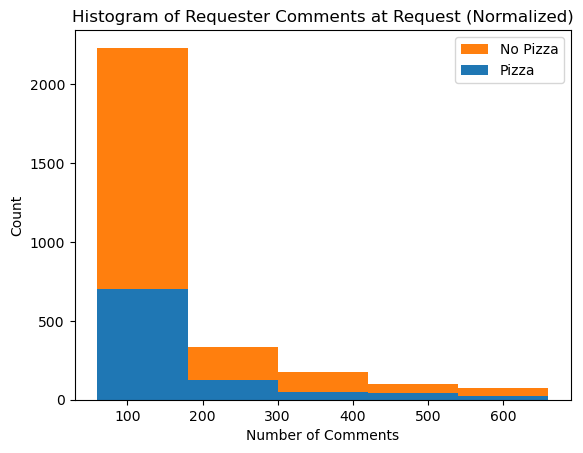

In [45]:
plot_hist(col='requester_number_of_comments_at_request', 
         title_label='Histogram of Requester Comments at Request (Normalized)',
         values_label = 'Number of Comments',
         df1 = pizza_eda,
         df2 = no_pizza_eda,
         bins = 5,
         range = [0, 600],
         histtype = 'stepfilled',
         align = 'right',
         log = True)

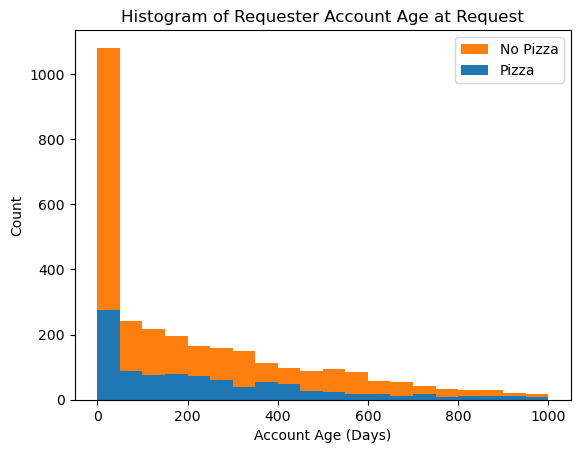

In [61]:
plot_hist(col='requester_account_age_in_days_at_request', 
          values_label = 'Account Age (Days)',
          title_label='Histogram of Requester Account Age at Request',
         df1 = pizza_eda,
         df2 = no_pizza_eda,
         bins = 20,
         range = [0, 1000],
         histtype = 'stepfilled',
         align = 'mid',
         log = True)

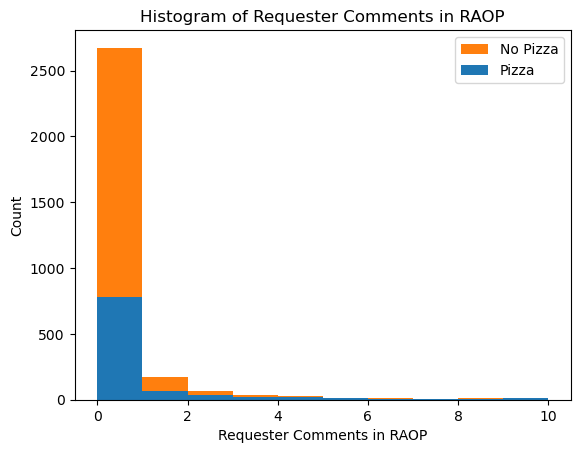

In [84]:
plot_hist(col='requester_number_of_comments_in_raop_at_request', 
          values_label = 'Requester Comments in RAOP',
          title_label='Histogram of Requester Comments in RAOP',
        df1 = pizza_eda,
        df2 = no_pizza_eda,
        bins = 10,
        range = [0, 10],
        histtype = 'stepfilled',
        align = 'mid')

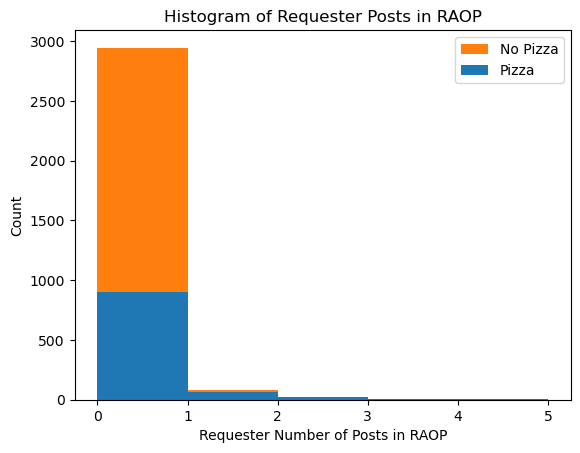

In [79]:
plot_hist(col='requester_number_of_posts_on_raop_at_request', 
        values_label = 'Requester Number of Posts in RAOP',
        title_label='Histogram of Requester Posts in RAOP',
        df1 = pizza_eda,
        df2 = no_pizza_eda,
        bins = 5,
        range = [0, 5],
        histtype = 'stepfilled',
        align = 'mid')

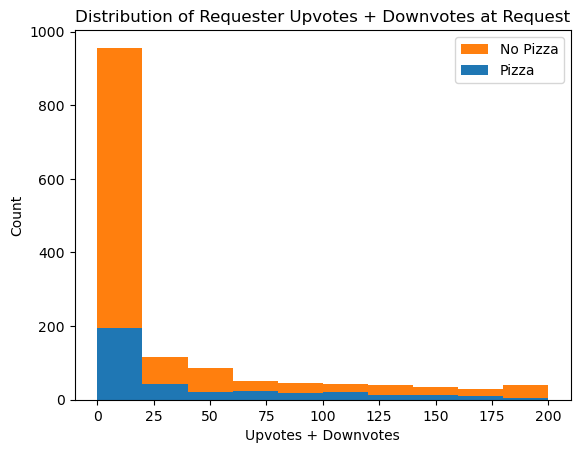

In [70]:
plot_hist(col='requester_upvotes_plus_downvotes_at_request', 
          values_label = 'Upvotes + Downvotes',
          title_label='Distribution of Requester Upvotes + Downvotes at Request',
        df1 = pizza_eda,
        df2 = no_pizza_eda,
        bins = 10,
        range = [0, 200],
        histtype = 'stepfilled',
        align = 'mid')

In [24]:
corr_table = eda_training.corr(numeric_only = True)

In [25]:
corr_table

,requester_account_age_in_days_at_request,requester_days_since_first_post_on_raop_at_request,requester_number_of_comments_at_request,requester_number_of_comments_in_raop_at_request,requester_number_of_posts_at_request,requester_number_of_posts_on_raop_at_request,requester_number_of_subreddits_at_request,requester_received_pizza,requester_upvotes_minus_downvotes_at_request,requester_upvotes_plus_downvotes_at_request,unix_timestamp_of_request,unix_timestamp_of_request_utc
requester_account_age_in_days_at_request,1.000000,0.231437,0.488341,0.054243,0.411907,0.033078,0.588118,0.041784,0.271963,0.115681,0.330437,0.330431
requester_days_since_first_post_on_raop_at_request,0.231437,1.000000,0.204728,0.354446,0.099312,0.292962,0.193807,0.098225,0.112943,0.078312,0.172005,0.172002
requester_number_of_comments_at_request,0.488341,0.204728,1.000000,0.122674,0.390735,0.068309,0.755857,0.033779,0.400108,0.162262,0.305059,0.305054
requester_number_of_comments_in_raop_at_request,0.054243,0.354446,0.122674,1.000000,0.019334,0.487150,0.082610,0.131296,0.129595,0.131645,0.048248,0.048248
requester_number_of_posts_at_request,0.411907,0.099312,0.390735,0.019334,1.000000,0.046357,0.598358,0.020612,0.545885,0.359416,0.135283,0.135281
requester_number_of_posts_on_raop_at_request,0.033078,0.292962,0.068309,0.487150,0.046357,1.000000,0.053959,0.137208,0.122886,0.130172,0.097666,0.097660
requester_number_of_subreddits_at_request,0.588118,0.193807,0.755857,0.082610,0.598358,0.053959,1.000000,0.037647,0.411542,0.184077,0.334743,0.334740
requester_received_pizza,0.041784,0.098225,0.033779,0.131296,0.020612,0.137208,0.037647,1.000000,0.032571,0.026102,-0.103348,-0.103346
requester_upvotes_minus_downvotes_at_request,0.271963,0.112943,0.400108,0.129595,0.545885,0.122886,0.411542,0.032571,1.000000,0.916014,0.177113,0.177113
requester_upvotes_plus_downvotes_at_request,0.115681,0.078312,0.162262,0.131645,0.359416,0.130172,0.184077,0.026102,0.916014,1.000000,0.089730,0.089731


In [102]:
pizza_eda[
    'requester_account_age_in_days_at_request'
][
    pizza_eda['requester_account_age_in_days_at_request'] < 90
].count() / len(pizza_eda)

0.3501006036217304

In [103]:
no_pizza_eda[
    'requester_account_age_in_days_at_request'
][
    no_pizza_eda['requester_account_age_in_days_at_request'] < 90
].count() / len(no_pizza_eda)

0.41661195009848984

In [106]:
pizza_eda_num = pizza_eda[pizza_eda.columns[pizza_eda.columns.isin(numeric_col)]]
no_pizza_eda_num = no_pizza_eda[no_pizza_eda.columns[no_pizza_eda.columns.isin(numeric_col)]]

In [117]:
for col in numeric_col:
    print(col)
    print('pizza mean:', np.mean(pizza_eda_num[col]))
    print('no pizza mean:', np.mean(no_pizza_eda_num[col]))
    print('difference:', np.mean(pizza_eda_num[col]) - np.mean(no_pizza_eda_num[col]))
    print()

requester_account_age_in_days_at_request
pizza mean: 276.76684350314855
no pizza mean: 247.34850245692593
difference: 29.418341046222622

requester_days_since_first_post_on_raop_at_request
pizza mean: 28.56375706787018
no pizza mean: 12.453198521588726
difference: 16.110558546281453

requester_number_of_comments_at_request
pizza mean: 126.52816901408451
no pizza mean: 111.36835193696652
difference: 15.159817077117992

requester_number_of_comments_in_raop_at_request
pizza mean: 1.4295774647887325
no pizza mean: 0.3890347997373605
difference: 1.040542665051372

requester_number_of_posts_at_request
pizza mean: 23.43762575452716
no pizza mean: 21.002298095863427
difference: 2.4353276586637342

requester_number_of_posts_on_raop_at_request
pizza mean: 0.14185110663983905
no pizza mean: 0.03808273145108339
difference: 0.10376837518875566

requester_number_of_subreddits_at_request
pizza mean: 19.509054325955734
no pizza mean: 17.609323703217335
difference: 1.8997306227383994

requester_receive